<img src="logo.jpg" />

## [Pedram Jahangiry](https://github.com/PJalgotrader) 

# Unsupervised Learning: Principle Component Analysis (PCA) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
rand_state= 1000

First, let's quickly replicate the two PC for USArrests dataset.

In [3]:
usarrest = pd.read_csv('USArrests.csv')
X= usarrest.iloc[:,1:5]
usarrest.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


We need to scale our feature space first!

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca=PCA(n_components=2)
pca.fit(X_sc)

pca_unscaled=PCA(n_components=2)
pca_unscaled.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
print(pca.components_)

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]]


In [8]:
print(pca_unscaled.components_)

[[ 0.04170432  0.99522128  0.04633575  0.0751555 ]
 [ 0.04482166  0.05876003 -0.97685748 -0.20071807]]


In [9]:
 print(pca.explained_variance_ratio_)

[0.62006039 0.24744129]


In [10]:
 print(pca_unscaled.explained_variance_ratio_)

[0.96553422 0.02781734]


You see how important is rescaling! 

<img src="PC_scaled.png" />


### Proportion Variance Explained (PVE): Optimal number of PC

In [11]:
pca=PCA(n_components=4)
pca.fit(X_sc)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [13]:
PVE=pd.DataFrame({'PVE':pca.explained_variance_ratio_, 'Principal Component':range(1,pca.n_components+1)})
PVE.head()

,PVE,Principal Component
0,0.620060,1
1,0.247441,2
2,0.089141,3
3,0.043358,4


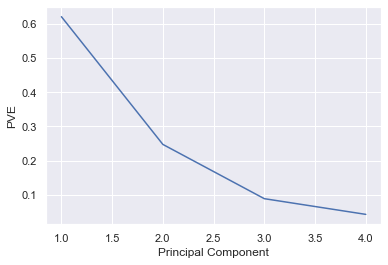

In [14]:
sns.lineplot(x='Principal Component', y='PVE', data=PVE)
plt.show()

* Now let's work with a new data set with larger feature space! The dataset is called wine and it is a famous one in Machine Learning community. 
* More on wine data set: http://archive.ics.uci.edu/ml/datasets/wine

In [15]:
df = pd.read_csv('Wine.csv')

In [16]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [18]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [19]:
df.groupby(['Customer_Segment']).mean().round(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Customer_Segment,,,,,,,,,,,,,
1,13.74,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,5.53,1.06,3.16,1115.71
2,12.28,1.93,2.24,20.24,94.55,2.26,2.08,0.36,1.63,3.09,1.06,2.79,519.51
3,13.15,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,7.40,0.68,1.68,629.90


### Finding the optimal number of principles:

In [20]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
X = df.drop('Customer_Segment', axis=1, inplace=False)
X = sc.fit_transform(X)

In [21]:
pca=PCA(n_components=13)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [23]:
PVE=pd.DataFrame({'PVE':pca.explained_variance_ratio_, 'Principal Component':range(1,pca.n_components+1)})
PVE.head()

,PVE,Principal Component
0,0.361988,1
1,0.192075,2
2,0.111236,3
3,0.070690,4
4,0.065633,5


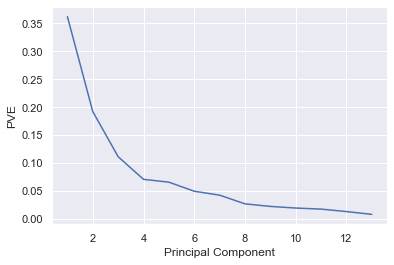

In [24]:
sns.lineplot(x='Principal Component', y='PVE', data=PVE)
plt.show()

It seems that the optimal number of PC is 4. with 4 PC, almost 73% of variations are explained. (36+19+11+7)

Now let's say we want to use PC as preprocessing the data for using a supervised ML model (logistic regression for example). Remember, the targer variable is Customer_Segment with 3 classes. For illustration purposes we will use PC=2 and look at our classification boundary!

###  Logistic regressions  (X = 13 All the Features)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
y = df['Customer_Segment']
X = df.drop('Customer_Segment', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [27]:
# Fitting Logistic Regression to the Training set
logistic = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Predicting the Test set results
y_pred_test = logistic.predict(X_test)

### the Confusion Matrix 

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]], dtype=int64)

In [31]:
# defining our own confusion matrix function for multiple classes
from sklearn.metrics import confusion_matrix
def multi_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    accuracy = round(np.diag(cm).sum()/cm.sum(),2)
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print("-----------------------------------------")
    return cm
 

In [32]:
multi_confusion_matrix(y_test,y_pred_test)



Accuracy = 0.94
-----------------------------------------


array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]], dtype=int64)

###  Cross validation

Now let's try to get an estimate for the accuracy of our model using cross validation technique. 

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
accuracy = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
round(accuracy.mean(),2)

0.99

###  Logistic regressions  (PC = 2 explaining 57% of variations in X)

In [35]:
pca=PCA(n_components=2)
PC_train= pca.fit_transform(X_train)
PC_test=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.36768289, 0.19262775])

Now fitting the exact same logisticregression model (we named it logistic) to the 2 principle components and comparing the confusion matrix.

In [36]:
logistic.fit(PC_train, y_train)

# Predicting the Test set results
y_pred_test = logistic.predict(PC_test)

In [37]:
multi_confusion_matrix(y_test,y_pred_test)



Accuracy = 0.94
-----------------------------------------


array([[ 9,  0,  0],
       [ 1, 16,  1],
       [ 0,  0,  9]], dtype=int64)

### Wow!!! we got the same accuracy in the test set by using only 2 PC instead of 13 X. 

**Exercise**: 

1. Try n_components=3! why the accuracy descreased? what's going on? 
2. Try n_components=max features =13! what do you expect to see for accuracy?

### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


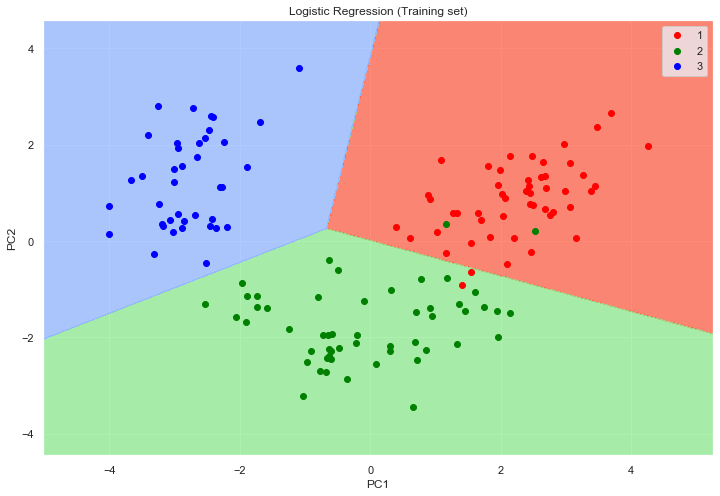

In [38]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = PC_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90','#94b9ff')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

###  Additional links:
1. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. PCA visualization: https://setosa.io/ev/principal-component-analysis/
3. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
4. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
5. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk